#**Extracción de datos**

In [1]:
import pandas as pd

In [2]:
# Cargamos los datos
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [3]:
#Convertir los datos a un DataFrame de Pandas para facilitar su manipulación
datos=pd.read_json(url)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
# Normalizamos cada columna anidada
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

In [5]:
# Concatenamos con columnas que ya son planas
base_df = datos[['customerID', 'Churn']]
datos_final = pd.concat([base_df, customer_df, phone_df, internet_df, account_df], axis=1)
# Mostramos las primeras filas del resultado
datos_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
#revisamos si hay valores ausentes
datos_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [8]:
# Revisamos duplicados
print("Filas duplicadas:", datos_final.duplicated().sum())
print("customerID duplicados:", datos_final['customerID'].duplicated().sum())

Filas duplicadas: 0
customerID duplicados: 0


In [9]:
#revisamos los tipos de datos
print(datos_final.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [10]:
#cambiamos la columna Charges.Total de objet a numerico (float64)
import numpy as np

In [11]:
# Eliminar espacios y convertir a número
datos_final['Charges.Total'] = pd.to_numeric(datos_final['Charges.Total'].astype(str).str.strip(), errors='coerce')

In [12]:
datos_final['Charges.Total']= datos_final['Charges.Total'].astype(np.float64)

In [13]:
#revisamos que la columna se haya convertido a numerica
print(datos_final.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object


In [14]:
datos_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##Columna de Cuentas diarias
Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [15]:
# Suponiendo 30 días por mes
dias_promedio_mes = 30

# Crear la columna Cuentas_Diarias
datos_final['Cuentas_Diarias'] = datos_final['Charges.Monthly'] / dias_promedio_mes

In [16]:
#Verificamos que se a creado la nueva columna
datos_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##Estandarización y transformación de datos

In [17]:
# Reemplazar "Yes"/"No" por 1/0 en todas las columnas categóricas tipo sí/no
cols_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                 'Churn', 'MultipleLines', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_binarias:
    datos_final[col] = datos_final[col].map({'Yes': 1, 'No': 0})

In [18]:
# Limpiar nombres: minúsculas, reemplazar espacios y puntos
datos_final.columns = datos_final.columns.str.lower().str.replace('.', '_').str.replace(' ', '_')

In [19]:
# Traducir valores en algunas columnas
datos_final['gender'] = datos_final['gender'].map({'Male': 'Hombre', 'Female': 'Mujer'})

# Renombrar algunas columnas
datos_final.rename(columns={
    'charges_monthly': 'cargos_mensuales',
    'charges_total': 'cargos_totales',
    'tenure': 'meses_servicio'
    }, inplace=True)

In [20]:
#Revisamos los cambios
datos_final.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,meses_servicio,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,0.0,Mujer,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Hombre,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Hombre,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Hombre,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Mujer,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


## Analisis descriptivo

In [21]:
# Calcula las estadísticas descriptivas básicas para columnas numéricas
desc_stats = datos_final.describe()

# Calcula la mediana para cada columna numérica
medians = datos_final.median(numeric_only=True)

# Calcula la moda (valor más frecuente) de cada columna numérica
modes = datos_final.mode(numeric_only=True).iloc[0]

# Resultados
print("Resumen estadístico:")
print(desc_stats)

print("\nMedianas:")
print(medians)

print("\nModas:")
print(modes)


Resumen estadístico:
             churn  seniorcitizen      partner   dependents  meses_servicio  \
count  7043.000000    7267.000000  7267.000000  7267.000000     7267.000000   
mean      0.265370       0.162653     0.484106     0.300124       32.346498   
std       0.441561       0.369074     0.499782     0.458343       24.571773   
min       0.000000       0.000000     0.000000     0.000000        0.000000   
25%       0.000000       0.000000     0.000000     0.000000        9.000000   
50%       0.000000       0.000000     0.000000     0.000000       29.000000   
75%       1.000000       0.000000     1.000000     1.000000       55.000000   
max       1.000000       1.000000     1.000000     1.000000       72.000000   

       phoneservice  multiplelines  onlinebackup  deviceprotection  \
count   7267.000000    6560.000000   5686.000000       5686.000000   
mean       0.902711       0.467226      0.440380          0.438094   
std        0.296371       0.498963      0.496476         

In [22]:
#Realizamos el analisis a las ultimas columnas revisando el promedio
grouped = datos_final.groupby('churn')[['cargos_mensuales', 'cargos_totales', 'cuentas_diarias', 'meses_servicio']].mean()
# imprimimos el promedio
print("\nPromedios por grupo de churn:")
print(grouped)


Promedios por grupo de churn:
       cargos_mensuales  cargos_totales  cuentas_diarias  meses_servicio
churn                                                                   
0.0           61.265124     2555.344141         2.042171       37.569965
1.0           74.441332     1531.796094         2.481378       17.979133


## Distribución de evasión

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

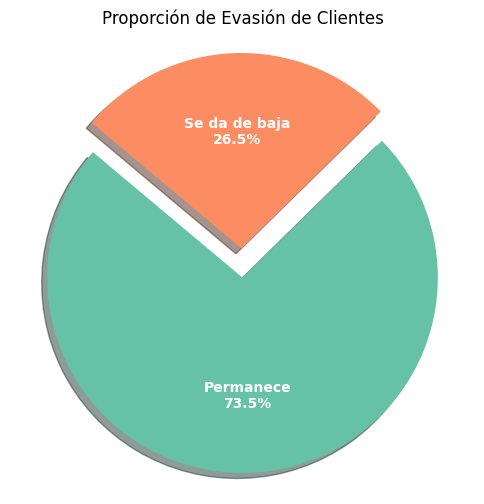

In [24]:
# Datos
conteo_evasion = datos_final['churn'].value_counts()
labels = ['Permanece', 'Se da de baja']
colors = ['#66c2a5', '#fc8d62']
explode = (0.05, 0.1)

# Función personalizada para autopct (muestra etiqueta + %)
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        idx = int(round(pct * len(values) / 100.0))
        return '{:.1f}%'.format(pct)
    return my_autopct

# Crear gráfico
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    conteo_evasion,
    autopct=make_autopct(conteo_evasion),
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    labels=None  # No usamos etiquetas externas
)

# Añadir etiquetas manualmente dentro de cada porción
for i, text in enumerate(autotexts):
    text.set_text(f'{labels[i]}\n{text.get_text()}')  # Agrega nombre + porcentaje
    text.set_color('white')  # Mejor contraste
    text.set_fontweight('bold')
    text.set_fontsize(10)

plt.title('Proporción de Evasión de Clientes')
plt.axis('equal')
plt.show()

## Análisis de Evasión por Variables Categóricas

### Gráfico de evasión por género

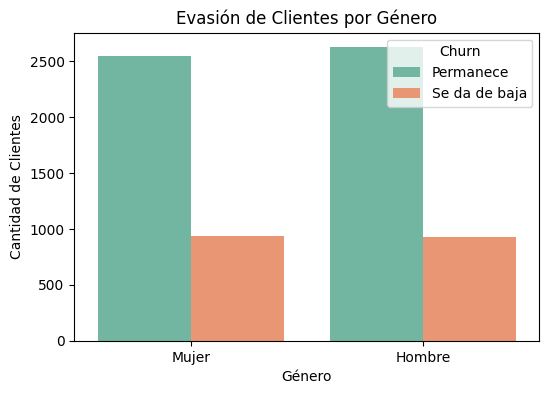

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='churn', data=datos_final, palette='Set2')
plt.title('Evasión de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['Permanece', 'Se da de baja'])
plt.show()


### Gráfico de evasión por tipo de contrato

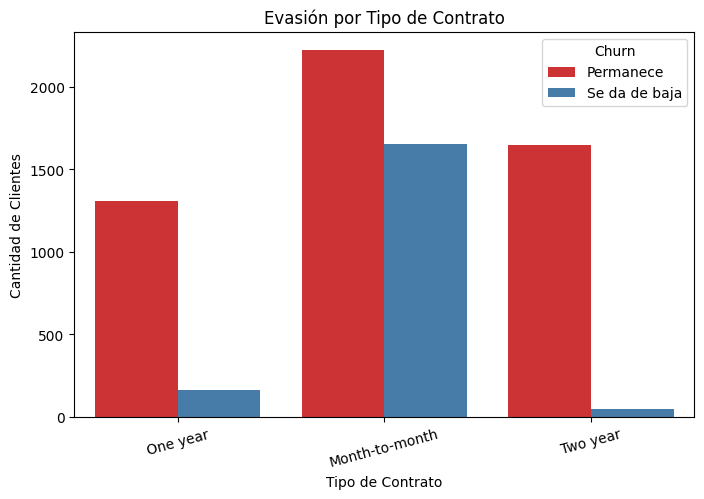

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='contract', hue='churn', data=datos_final, palette='Set1')
plt.title('Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['Permanece', 'Se da de baja'])
plt.xticks(rotation=15)
plt.show()


### Gráfico de evasión por método de pago

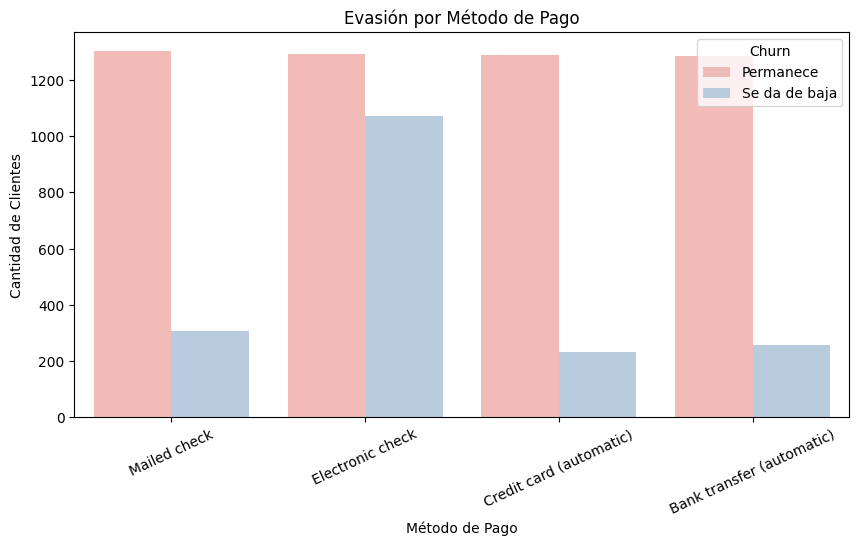

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(x='paymentmethod', hue='churn', data=datos_final, palette='Pastel1')
plt.title('Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['Permanece', 'Se da de baja'])
plt.xticks(rotation=25)
plt.show()
